## Set up model and data

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.manifold import TSNE
%matplotlib inline

d:\programdata\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
PATH = "data/dogscats" 

In [3]:
def create_generator(image_size=224, batch_size = 32):
    train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    
    return train_data_generator.flow_from_directory(directory='{}/train'.format(PATH),
                                                      shuffle=True,
                                                target_size=(image_size, image_size),
                                                batch_size=batch_size,
                                                class_mode='binary')


In [4]:
def get_model(model_architecture, image_size):
    return model_architecture(include_top=True, weights='imagenet', input_shape=(image_size,image_size,3))

In [5]:
def evaluate(model, data_generator, num_steps=100):
    results = np.array([])
    labels = np.array([])

    for step in range(1, num_steps+1):
        images, batch_labels = data_generator.next()

        if (step % 10 == 0):
            print('Batch {}'.format(step))

        batch_results = model.predict(images)

        if len(results) == 0:
            results = batch_results
            labels = batch_labels
        else:
            results = np.concatenate((results, batch_results))
            labels = np.concatenate((labels, batch_labels))

    return results, labels

# using t-SNE to reduce to the required classes

In [8]:
def run_test(model_architecture=tf.keras.applications.InceptionV3, image_size=299, perplexity=30):
    print('Creating data generator')
    data_generator = create_generator(image_size=image_size)

    print('Creating model')
    model = get_model(model_architecture=model_architecture, image_size=image_size)
    
    print('Evaluating model')
    results, labels = evaluate(model, data_generator)
    
    print('Reducing to two dimensions')
    tsne_model = TSNE(learning_rate=100, n_components=2, random_state=0, perplexity=perplexity)
    tsne_transformed = tsne_model.fit_transform(results)
    plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1],c = labels)
    

Creating data generator
Found 17500 images belonging to 2 classes.
Creating model
Evaluating model
Batch 10
Batch 20
Batch 30
Batch 40
Batch 50
Batch 60
Batch 70
Batch 80
Batch 90
Batch 100


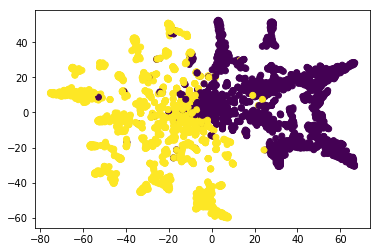

In [12]:
run_test(model_architecture=tf.keras.applications.InceptionV3, image_size=299)

Creating data generator
Found 17500 images belonging to 2 classes.
Creating model
Evaluating model
Batch 10
Batch 20
Batch 30
Batch 40
Batch 50
Batch 60
Batch 70
Batch 80
Batch 90
Batch 100
Reducing to two dimensions


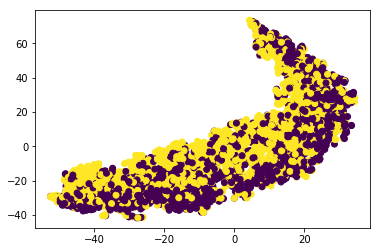

In [9]:
run_test(tf.keras.applications.VGG19, 224, 50)

Creating data generator
Found 17500 images belonging to 2 classes.
Creating model
Evaluating model
Batch 10
Batch 20
Batch 30
Batch 40
Batch 50
Batch 60
Batch 70
Batch 80
Batch 90
Batch 100
Reducing to two dimensions


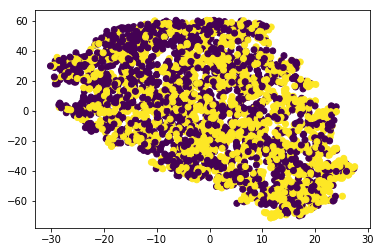

In [11]:
run_test(tf.keras.applications.ResNet50, 224, 50)

Creating data generator
Found 17500 images belonging to 2 classes.
Creating model
17227776/17225924 [==============================] - 11s 1us/step
Evaluating model
Batch 10
Batch 20
Batch 30
Batch 40
Batch 50
Batch 60
Batch 70
Batch 80
Batch 90
Batch 100
Reducing to two dimensions


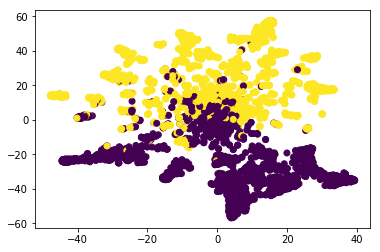

In [12]:
run_test(tf.keras.applications.MobileNet, 224, 50)

Creating data generator
Found 17500 images belonging to 2 classes.
Creating model
359751680/359746192 [==============================] - 134s 0us/step
Evaluating model
Batch 10
Batch 20
Batch 30
Batch 40
Batch 50
Batch 60
Batch 70
Batch 80
Batch 90
Batch 100
Reducing to two dimensions


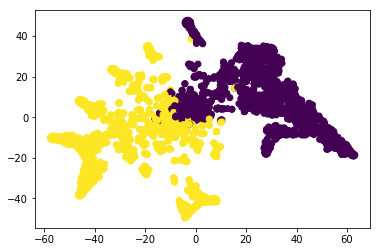

In [14]:
run_test(tf.keras.applications.NASNetLarge, 331, 50)